In [31]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

# Amostragem Simples

In [3]:
iris = pd.read_csv('dados/iris.csv')
infert = pd.read_csv('dados/infert.csv')

In [47]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.shape[0]

150

In [91]:
infert.head()

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32


In [92]:
infert.shape

(248, 9)

In [18]:
#Ao definir uma seed, fazemos com que a função reproduza os mesmos números pseudorandomicos.
np.random.seed(2345)

amostra = np.random.choice(a=[0,1], size=iris.shape[0], replace = True, p=[0.7,0.3])
print(amostra)
len(amostra)

[0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 1]


150

In [23]:
len(amostra[amostra==0])

101

In [24]:
len(amostra[amostra==1])

49

In [28]:
iris_amostra = iris[amostra == 0]
iris_amostra.shape

(101, 5)

# Amostragem Sistemática

## Definição do intervalo da escolha

In [31]:
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
print(k)

10


## Definindo o inicio da seleção

In [42]:
# Definição do valor randômico para inicializar a amostra, iniciando em 1 até k + 1
r = np.random.randint(low = 1, high = k + 1, size = 1)
print(r)

[6]


In [44]:
acumulador = r[0]
sorteados = []

for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k

print(sorteados)

[6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146]


In [50]:
iris.iloc[sorteados]

,sepal length,sepal width,petal length,petal width,class
6,4.6,3.4,1.4,0.3,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor


In [53]:
iris_amostra_sistemica = base.iloc[sorteados]
iris_amostra_sistemica.shape

(15, 5)

# Amostragem Estratificada

## Estratificação de amostra cuja população é balanceada

In [55]:
iris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [80]:
iris.iloc[:,0:4]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
iris.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [89]:
X, _,y, _ = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4], test_size=0.5, stratify = iris.iloc[:,4])
y.value_counts()

Iris-virginica     25
Iris-versicolor    25
Iris-setosa        25
Name: class, dtype: int64

## Estratificação de Amostra cuja População não é balanceada

O problema que enfrentamos aqui é trazermos uma amostra que represente bem cada uma das classes!

In [94]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [97]:
infert.iloc[:,2:9]

,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,26,6,1,1,2,1,3
1,42,1,1,1,0,2,1
2,39,6,2,1,0,3,4
3,34,4,2,1,0,4,2
4,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...
243,31,1,0,0,1,79,45
244,34,1,0,0,0,80,47
245,35,2,2,0,0,81,54
246,29,1,0,0,1,82,43


In [99]:
infert.iloc[:,1]

0       0-5yrs
1       0-5yrs
2       0-5yrs
3       0-5yrs
4      6-11yrs
        ...   
243    12+ yrs
244    12+ yrs
245    12+ yrs
246    12+ yrs
247    12+ yrs
Name: education, Length: 248, dtype: object

In [105]:
# iris.iloc[:, 0:4]: buscamos somente os atributos previsores, ou seja, os dados sobre pétala e sétala da planta
# iris.iloc[:, 4]: buscamos somente a classe, que é a espécie da planta (setosa, virginica ou versicolor)
# test_size: selecionamos 50% da base de dados, que serão copiados para as variáveis X e Y. Essa função retorna 4 valores,
# porém, vamos usar somente os 50% da base de dados e por isso colocamos "_" para os outros valores
# stratify: para retornar a amostra baseada na classe
X1, _,y1, _ = train_test_split(infert.iloc[:,2:9],infert.iloc[:,1], test_size=0.6, stratify = infert.iloc[:,1])
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [101]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

# Medidas de Centralidade

In [6]:
jogadores = [40000, 18000, 12000,250000, 30000, 140000, 300000, 40000,800000]
len(jogadores)

9

In [7]:
np.mean(jogadores)

181111.11111111112

In [8]:
np.median(jogadores)

40000.0

In [10]:
np.median([0,5,1,3,5,5,4])

4.0

In [16]:
quartis = np.quantile(jogadores,[0,.25,.50,.75,1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [18]:
np.std(jogadores, ddof=1)

255307.87514511007

In [19]:
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

# Distribuição Normal

Dado um conjunto de objetos em um cesto, a média é 8 e o desvio padrão é 2.

In [22]:
# Qual a probablidade de tirar um objeto cujo peso é menor que 6 quilos?
norm.cdf(6,8,2)

0.15865525393145707

In [24]:
# Qual a probablidade de tirar um objeto cujo peso é maior que 6 quilos?
norm.sf(6,8,2)

0.8413447460685429

In [25]:
1 - norm.cdf(6,8,2)

0.8413447460685429

In [26]:
# Qual a probablidade de tirar um objeto cujo peso é menor que 6 quilos ou maior que 10??
norm.cdf(6,8,2) + norm.sf(10,8,2)

0.31731050786291415

In [28]:
# Qual a probablidade de tirar um objeto cujo peso é maior que 8 quilos e menor que 10??
norm.cdf(8,8,2) - norm.sf(10,8,2)

0.3413447460685429

# Testes de Normalidade

In [34]:
dados = norm.rvs(size=1000)


(array([  1.,   6.,   7.,  21.,  35.,  34.,  72.,  83., 114., 117., 121.,
        108.,  95.,  70.,  57.,  27.,  18.,   8.,   3.,   3.]),
 array([-3.16801423, -2.85578059, -2.54354695, -2.23131332, -1.91907968,
        -1.60684604, -1.29461241, -0.98237877, -0.67014513, -0.35791149,
        -0.04567786,  0.26655578,  0.57878942,  0.89102305,  1.20325669,
         1.51549033,  1.82772396,  2.1399576 ,  2.45219124,  2.76442488,
         3.07665851]),
 <BarContainer object of 20 artists>)

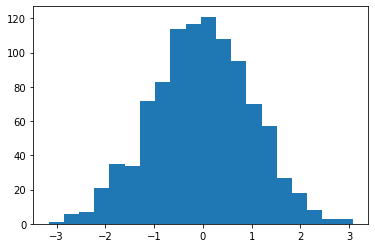

In [35]:
plt.hist(dados, bins=20)

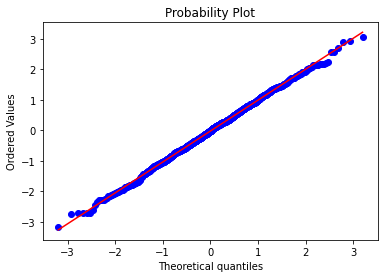

In [38]:
#Geração de gráfico para ver se a distribuição é Normal: Se os pontos(dados) estiverem em sua maioria acompanhando a linha, 
#significa que é normal
fig, ax = plt.subplots()
stats.probplot(dados,fit=True, plot=ax)
plt.show()

## Teste de Shapiro

In [40]:
stats.shapiro(dados)

ShapiroResult(statistic=0.9987058043479919, pvalue=0.6924523115158081)

## Dados não normais

In [53]:
dados2 = skewnorm.rvs(4, size=1000)

(array([ 17.,  58., 102., 140., 150., 130., 103.,  84.,  62.,  56.,  31.,
         26.,  21.,  10.,   2.,   4.,   2.,   1.,   0.,   1.]),
 array([-0.36928052, -0.17287201,  0.02353649,  0.219945  ,  0.4163535 ,
         0.61276201,  0.80917051,  1.00557901,  1.20198752,  1.39839602,
         1.59480453,  1.79121303,  1.98762154,  2.18403004,  2.38043855,
         2.57684705,  2.77325556,  2.96966406,  3.16607256,  3.36248107,
         3.55888957]),
 <BarContainer object of 20 artists>)

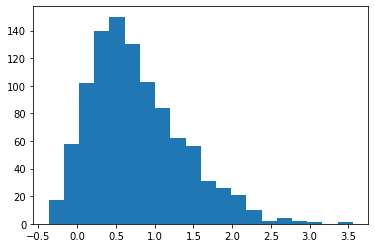

In [54]:
plt.hist(dados2,bins=20)

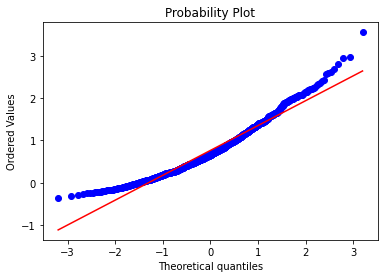

In [55]:
#Geração de gráfico para ver se a distribuição é Normal: Se os pontos(dados) estiverem em sua maioria acompanhando a linha, 
#significa que é normal
fig, ax = plt.subplots()
stats.probplot(dados2,fit=True, plot=ax)
plt.show()

In [56]:
stats.shapiro(dados2)

ShapiroResult(statistic=0.959032416343689, pvalue=4.0422966576706776e-16)